In [57]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns

In [63]:
boston = load_boston()
data = boston["data"]
feature_names = boston["feature_names"]
target = boston["target"]
x = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=["price"])

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
182,0.09103,0.0,2.46,0.0,0.4880,7.155,92.2,2.7006,3.0,193.0,17.8,394.12,4.82
155,3.53501,0.0,19.58,1.0,0.8710,6.152,82.6,1.7455,5.0,403.0,14.7,88.01,15.02
280,0.03578,20.0,3.33,0.0,0.4429,7.820,64.5,4.6947,5.0,216.0,14.9,387.31,3.76
126,0.38735,0.0,25.65,0.0,0.5810,5.613,95.6,1.7572,2.0,188.0,19.1,359.29,27.26
329,0.06724,0.0,3.24,0.0,0.4600,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34


In [64]:
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [51]:
clf = RandomForestRegressor(n_estimators=1000, max_depth=7)

In [52]:
clf.fit(x_train, y_train.values[:, 0])

RandomForestRegressor(max_depth=7, n_estimators=1000)

In [53]:
y_pred = clf.predict(x_test)

In [54]:
mean_squared_error(check_test["y_pred"], check_test["y_test"])

21.517444231177134

In [55]:
mean_absolute_error(check_test["y_pred"], check_test["y_test"])

3.1627098714573902

Точность предсказаний двумя способами "Линейной регрессией" и "Случайным лесом регрессий" полностью совпала. Но только при разбиении Тест/Тренировочный в отношении 30/70. При разбиении 25/75 "Случайный лес регрессий" сохранил точность, а "Линейнаяй регрессиия" потеряла в точности.

RandomForestRegressor

feature_importances_ : ndarray of shape (n_features,)
    The impurity-based feature importances.
    The higher, the more important the feature.
    The importance of a feature is computed as the (normalized)
    total reduction of the criterion brought by that feature.  It is also
    known as the Gini importance.

    Warning: impurity-based feature importances can be misleading for
    high cardinality features (many unique values). See
    :func:`sklearn.inspection.permutation_importance` as an alternative.

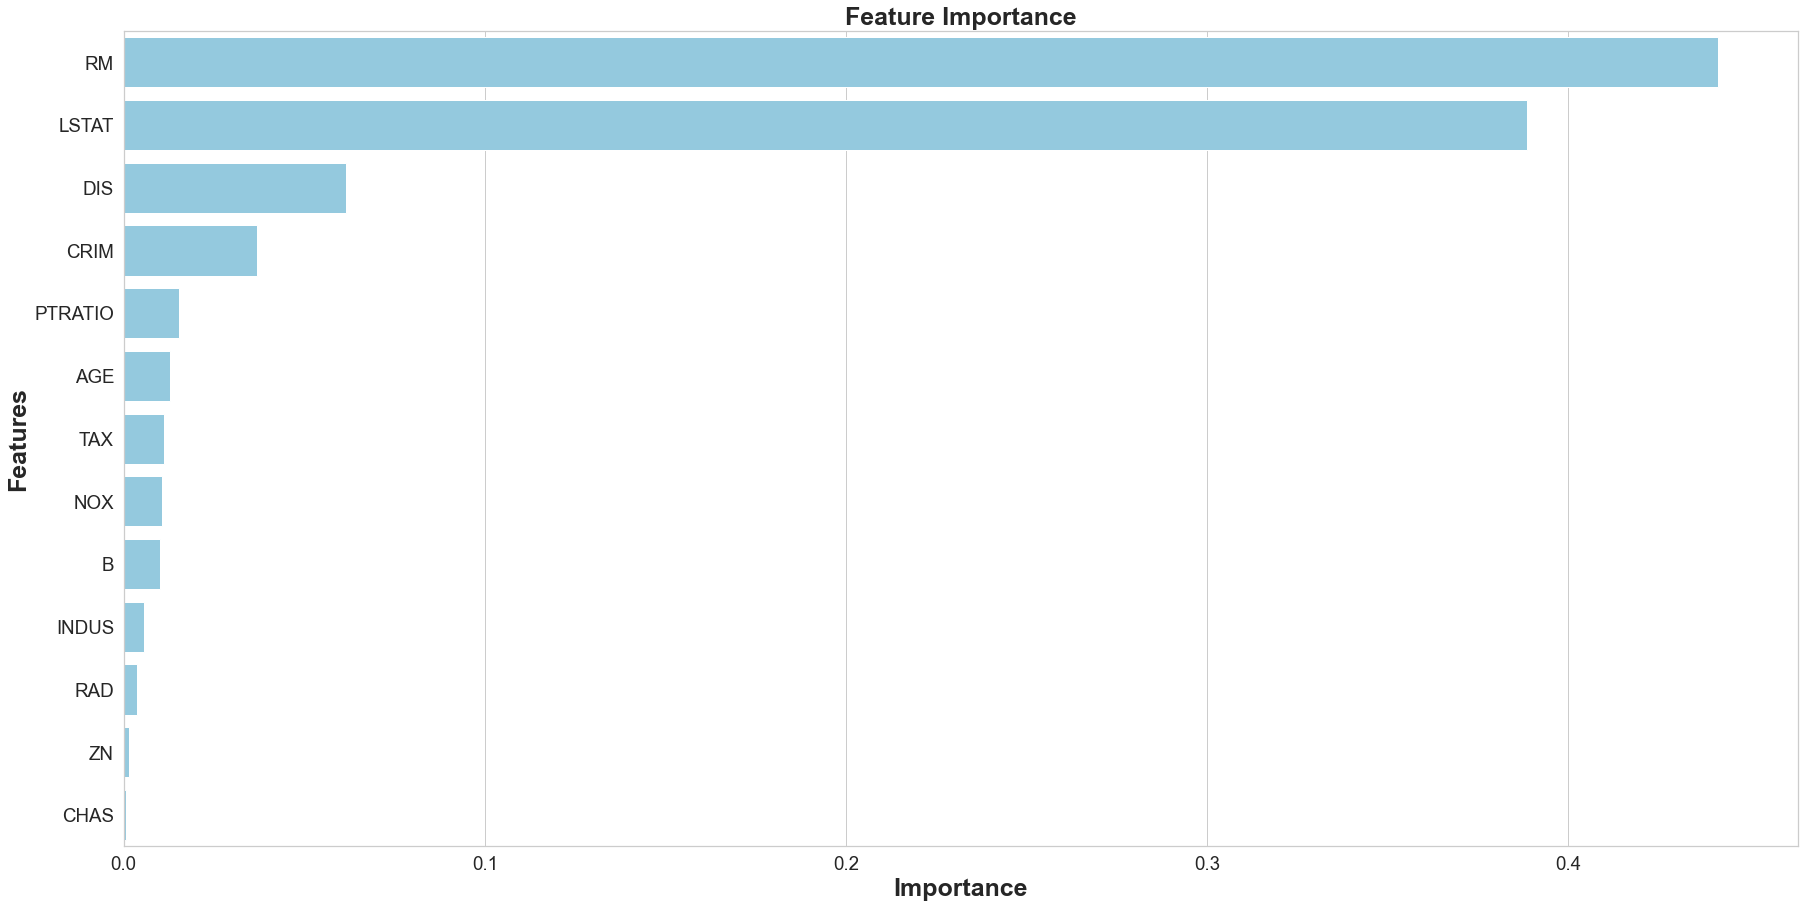

None

,Features,Gini-Importance
0,RM,0.441372
1,LSTAT,0.388474
2,DIS,0.061697
3,CRIM,0.036888
4,PTRATIO,0.015217
5,AGE,0.012907
6,TAX,0.011103
7,NOX,0.010508
8,B,0.010146
9,INDUS,0.005556


In [60]:
feats = {}
for feature, importance in zip(x_test.columns, clf.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

Наиболее эффективными оказались признаки RM (количество комнат) и LSTAT (престижность района), что естественно логично так как эти два показателя в основном и определяют цену. =)